# MIEC Analysis Cleaning Data

In [23]:
import numpy as np
import pandas as pd
import glob
import re
import os
import seaborn as sns

import matplotlib.pyplot as plt

## MIEC


In [24]:
path1 = '/Users/chadp/Documents/MIEC/'
file1 = 'MIEC_10A_T_Full_AVER_SUV92MTN.list'
file2 = 'MIEC_10A_T_Full_AVER.list'

In [25]:
df = pd.read_csv(path1+file2, delimiter= ' ', header= None)
df.iloc[0,2:]

2      -0.877
3      -2.714
4       1.521
5      -0.147
6      -0.947
        ...  
661    -0.351
662    -0.718
663   -37.025
664    24.162
665    -0.409
Name: 0, Length: 664, dtype: object

In [26]:
#np.matrix(np.array(df3))

# Put data into a list of 4 interaction terms that correspond to each interaction pair

In [27]:
from itertools import groupby

def four_inter(data):
    df = []
#    print(data)
    df = data
    c_ln = int(df.shape[1])
    n_dim = c_ln/4
    
    lt = ["VDW", "ELE", "GB", "SA"]
    op = []
    
    for k, j in enumerate(lt):
        if lt[k] == j:
            for i in range(int(n_dim)):
                f = j + "_" + str(i)
                op.append(f)
            
            
    res = [list(i) for j, i in groupby(op, lambda a: a.split('_')[0])]
    df1 = pd.DataFrame(res[0])
    df2 = pd.DataFrame(res[1])
    df3 = pd.DataFrame(res[2])
    df4 = pd.DataFrame(res[3])
    
    column_names = pd.concat([df1,df2,df3,df4], axis=1).to_numpy().flatten().tolist()
    nam = ["names"]
    bind = ["bind"]


    lt_col = nam + bind + column_names
    
    return lt_col


In [28]:
df = pd.read_csv(path1+file2, delimiter=' ',names=four_inter(df))

#### Get row max values
df_max = pd.DataFrame({'max': abs(df.iloc[:,2:]).max(axis=1)})

## Add a column to contain max values from each row
df2 = pd.concat([df, df_max], axis = 1)
df_bind = df['bind']

# Divide each Column by its Max Value

5484/457 gives total number of protein readers

In [29]:
## Inspect the Data

df2.head()
df2.shape

(5484, 667)

# Maybe we need to parse the list into a list-of-list containg a list of individual lists containing4 terms for interaction-pair 

In [30]:
#df22=df2.iloc[1].to_numpy().tolist()
#[df22[i:i + 4] for i in range(1, len(df22), 4)]

# Scaled / Normalized Dataset and reformat to original containing protein "names" and "bind" information.

In [31]:
df2_drop=df2.drop(columns=['names','bind','max'])
max_values = df2['max']

df2_div = df2_drop.divide(max_values, axis=0)
df2_scaled = pd.concat([df2[['names','bind']],df2_div], axis = 1)

In [32]:
df2_scaled.head()

,names,bind,VDW_0,ELE_0,GB_0,SA_0,VDW_1,ELE_1,GB_1,SA_1,...,GB_163,SA_163,VDW_164,ELE_164,GB_164,SA_164,VDW_165,ELE_165,GB_165,SA_165
0,CBX1-1_1,1,-0.023687,-0.073302,0.041080,-0.003970,-0.025577,-0.064578,0.063390,-0.006860,...,-0.056962,-0.008562,0.003808,0.064902,-0.349251,-0.009480,-0.019392,-1.000000,0.652586,-0.011047
1,CBX1-1_10,1,-0.024464,-0.080057,0.042976,-0.003977,-0.031903,-0.092275,0.086724,-0.007783,...,-0.064521,-0.009185,-0.009642,-0.189185,-0.379714,-0.009557,-0.036624,-0.841144,0.677396,-0.013391
2,CBX1-1_100,1,-0.032261,-0.032713,-0.004589,-0.005076,-0.031775,-0.085660,0.069842,-0.007787,...,-0.085451,-0.010742,-0.001912,-0.675891,0.049296,-0.011333,-0.036642,-1.000000,0.831809,-0.016165
3,CBX1-1_101,0,-0.026858,-0.093437,0.047046,-0.004139,-0.033081,-0.014620,0.008248,-0.007950,...,-0.031533,-0.009886,-0.002233,-0.468973,0.017181,-0.009379,-0.058718,-0.697505,0.680860,-0.017776
4,CBX1-1_102,0,-0.064613,-0.226965,0.114883,-0.009562,-0.091865,-0.260911,0.205587,-0.019193,...,-0.083328,-0.027799,-0.020490,-1.000000,0.114200,-0.023018,-0.109009,-0.232225,-0.085103,-0.038795


# Convert DataFrame to an array containing lists

In [33]:
df2_ary = np.asarray(df2_scaled.iloc[:,2:])
df2_ary.shape

(5484, 664)

In [34]:
df2_list = df2_scaled.iloc[:,2:].iloc[0].to_numpy().tolist()
df2_scaled.iloc[:,2:].iloc[0]

VDW_0     -0.023687
ELE_0     -0.073302
GB_0       0.041080
SA_0      -0.003970
VDW_1     -0.025577
             ...   
SA_164    -0.009480
VDW_165   -0.019392
ELE_165   -1.000000
GB_165     0.652586
SA_165    -0.011047
Name: 0, Length: 664, dtype: float64

In [35]:
#[df2_list[i:i + 4] for i in range(0, len(df2_list), 4)]
#df2_scaled.iloc[:,2:].iloc[0].to_numpy().tolist()

# Shape of Data

In [36]:
#df2_scaled.iloc[:,2:].iloc[i]
df2_scaled.shape

(5484, 666)

In [37]:
num_rows = df2_scaled.shape[0]
num_cols1 = df2_scaled.shape[1]
num_cols2 = df2_scaled.iloc[:,2:].shape[1]
df2_scaled.shape[0]

5484

# Convert each row to a list

In [38]:
ary1 = []
for i in range(num_rows):
    ary1.append(df2_scaled.iloc[:,2:].iloc[i].to_numpy().tolist())

In [39]:
np.asarray(ary1).shape

(5484, 664)

In [40]:
ary_bindd = np.asarray(df_bind)
#ary_bindd.shape

In [41]:
## Array listindex starts @ 1:
#ary1[0]

#  List of list of interaction terms for each pair

In [42]:
ary2 = []
for k in range(len(ary1)):
    hj = [ary1[k][i:i + 4] for i in range(0, len(ary1[k]), 4)]
    ary2.append(hj)
    


In [43]:
ary3 = np.array(ary2)


# Data has been Tokenized to account for the four different interaction terms for each pair

In [44]:
#ary2[10]

#  Define Training Data

In [45]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(ary3, test_size=0.1, random_state=10)

In [46]:
print("Training shape:",training_data.shape, "Testing shape:", testing_data.shape)

Training shape: (4935, 166, 4) Testing shape: (549, 166, 4)


In [47]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(ary3, ary_bindd, test_size=0.1, random_state=10)

In [50]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2_ary, ary_bindd, test_size=0.1, random_state=10)

In [48]:
x_train3.shape
y_train3.shape

(4935,)

In [49]:
training_data.shape
x_train3.shape

(4935, 166, 4)

# Neural Network - Case #2

In [16]:
import pandas as pd
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Model
import matplotlib.pyplot as plt

from math import *
from tensorflow import keras

from tensorflow import keras
from keras.models import Model, load_model
from keras.utils.vis_utils import plot_model
#from keras.optimizers import Adam, SGD
from keras.layers import *
from keras.metrics import *
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
#from hyperopt import hp, STATUS_OK

# Contextual Regression (CR) Model

In [755]:
training_data[1:].shape

(4934, 166, 4)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, Model, Input
from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D, MaxPool1D, UpSampling1D, \
                                            ReLU, Multiply


In [757]:
#([key for key in mse_history.keys()][3], [value for value in mse_history.values()][3])

In [758]:
training_data.shape

(4935, 166, 4)

In [382]:
tr2.shape

(4934, 1, 664)

# Convolutional Neural Network (CNN)

## [Batch_size, time_step (rows), n_features (columns)]

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D,AveragePooling1D
from keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import LeakyReLU
## sequence.pad_sequence(train_x, maxlen=max_words)
import pickle



# Model #2 Functional form

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 166, 4)]     0                                            
__________________________________________________________________________________________________
Conv1D_1 (Conv1D)               (None, 166, 16)      80          input[0][0]                      
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 166, 16)      64          Conv1D_1[0][0]                   
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 83, 16)       0           batch_normalization[0][0]        
______________________________________________________________________________________________

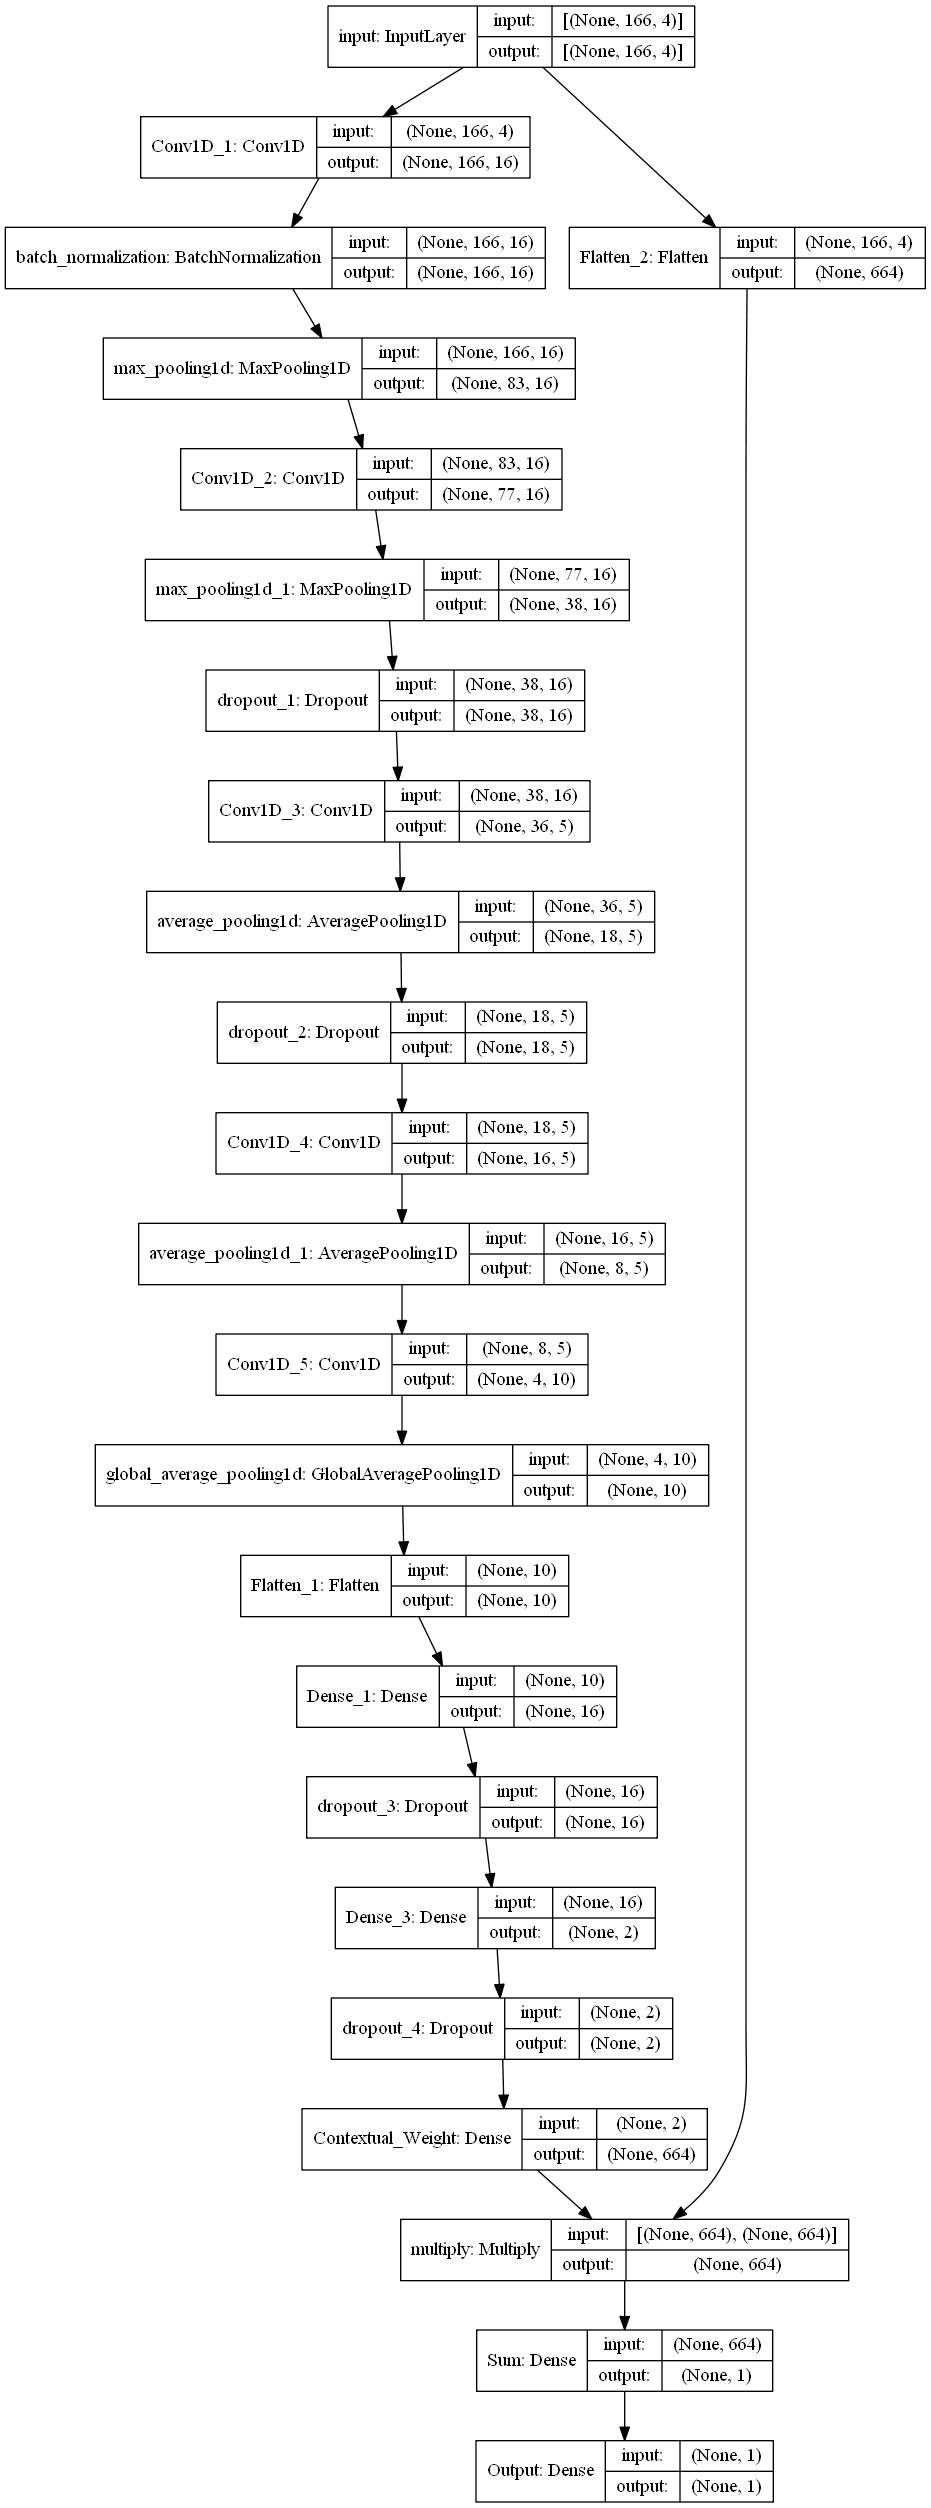

In [51]:
from numpy.random import seed
seed(123)


###  Convolutional Layer
layer0 = Input(shape=training_data.shape[1:], name='input')
layer1 = Conv1D(filters=16, kernel_size=1, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_1')(layer0)
layer2 = BatchNormalization()(layer1)
#model.add(LeakyReLU())
layer3 = MaxPool1D(pool_size=2, strides=2)(layer2)

layer4 = Conv1D(filters=16, kernel_size=7, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_2')(layer3)
layer5 = MaxPool1D(pool_size=2, strides=2)(layer4)
layer6 = Dropout(0.5, name='dropout_1')(layer5)

layer7 = Conv1D(filters=5, kernel_size=3, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_3')(layer6)
layer8 = AveragePooling1D(pool_size=2, strides=2)(layer7)
layer9 = Dropout(0.5, name='dropout_2')(layer8)

layer10 = Conv1D(filters=5, kernel_size=3, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_4')(layer9)
layer11 = AveragePooling1D(pool_size=2, strides=2)(layer10)

layer12 = Conv1D(filters=10, kernel_size=5, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_5')(layer11)
layer13 = GlobalAveragePooling1D()(layer12)

layer14 = Flatten(name='Flatten_1')(layer13)
layer15 = Dense(16,activation='relu',name='Dense_1')(layer14)
layer16 = Dropout(0.00099,name='dropout_3')(layer15)
layer17 = Dense(2,activation='relu',name='Dense_3')(layer16)

layer18 = Dropout(0.00099,name='dropout_4')(layer17)

### Contextual regression
layer19 = Dense(166*4,kernel_regularizer=tf.keras.regularizers.l1(0.0001),name='Contextual_Weight')(layer18) ## make first layer
layer20 = Dropout(0.00099,name='dropout_5')(layer19)

#### Dot Product
layer21 = Flatten(name='Flatten_2')(layer0)
layer22 = Multiply()([layer21,layer19]) ## same number of nodes as input feaures

layer23 = Dense(1,kernel_initializer='ones',use_bias=False,name='Sum')(layer22)
layer24 = Dense(1,name='Output')(layer23) 
model = Model(inputs=layer0, outputs=layer24)
model.layers[23].trainable = False
model.summary()
keras.utils.plot_model(model, "model_with_shape_info.png", show_shapes=True)

In [783]:
from tensorflow.keras.optimizers import SGD, Adam
from keras.metrics import *
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping


#model.compile(optimizer='Adam',loss='mse',metrics =['accuracy'])
model.compile(SGD(lr=0.01, momentum=0.9),'mean_squared_error', metrics=['accuracy']) ##, momentum=0.9
earlystop_cb = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')
check_cb = ModelCheckpoint('bestparams2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(x_train3, y_train3, batch_size=32, epochs=100, validation_split=0.20, callbacks=[earlystop_cb, check_cb]) 



Epoch 1/100
124/124 [==============================] - 3s 11ms/step - loss: 0.1810 - accuracy: 0.7611 - val_loss: 0.1710 - val_accuracy: 0.7609

Epoch 00001: val_loss improved from inf to 0.17099, saving model to bestparams2.h5
Epoch 2/100
124/124 [==============================] - 1s 9ms/step - loss: 0.1711 - accuracy: 0.7637 - val_loss: 0.1709 - val_accuracy: 0.7700

Epoch 00002: val_loss improved from 0.17099 to 0.17090, saving model to bestparams2.h5
Epoch 3/100
124/124 [==============================] - 1s 10ms/step - loss: 0.1680 - accuracy: 0.7708 - val_loss: 0.1663 - val_accuracy: 0.7751

Epoch 00003: val_loss improved from 0.17090 to 0.16626, saving model to bestparams2.h5
Epoch 4/100
124/124 [==============================] - 1s 8ms/step - loss: 0.1652 - accuracy: 0.7675 - val_loss: 0.1693 - val_accuracy: 0.7568

Epoch 00004: val_loss did not improve from 0.16626
Epoch 5/100
124/124 [==============================] - 1s 8ms/step - loss: 0.1651 - accuracy: 0.7710 - val_loss: 0

124/124 [==============================] - 1s 8ms/step - loss: 0.1515 - accuracy: 0.7814 - val_loss: 0.1546 - val_accuracy: 0.7832

Epoch 00041: val_loss did not improve from 0.15327
Epoch 42/100
124/124 [==============================] - 1s 7ms/step - loss: 0.1527 - accuracy: 0.7862 - val_loss: 0.1562 - val_accuracy: 0.7893

Epoch 00042: val_loss did not improve from 0.15327
Epoch 43/100
124/124 [==============================] - 1s 7ms/step - loss: 0.1503 - accuracy: 0.7842 - val_loss: 0.1550 - val_accuracy: 0.7842

Epoch 00043: val_loss did not improve from 0.15327
Epoch 44/100
124/124 [==============================] - 1s 7ms/step - loss: 0.1521 - accuracy: 0.7862 - val_loss: 0.1529 - val_accuracy: 0.7893

Epoch 00044: val_loss improved from 0.15327 to 0.15294, saving model to bestparams2.h5
Epoch 45/100
124/124 [==============================] - 1s 7ms/step - loss: 0.1512 - accuracy: 0.7819 - val_loss: 0.1594 - val_accuracy: 0.7842

Epoch 00045: val_loss did not improve from 0.152

In [784]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [785]:
model.predict(x_test3).shape

(549, 1)

# Loss Plot

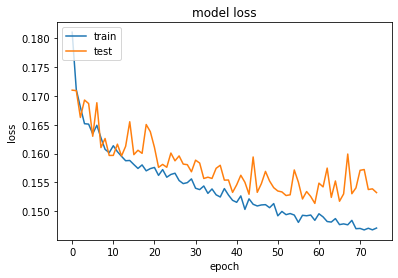

In [786]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Accuracy

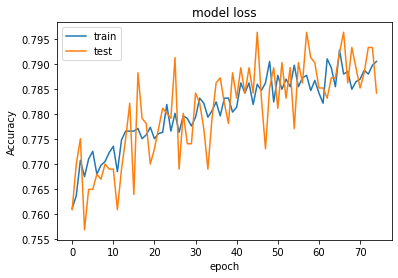

In [787]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculate Accuracy

In [791]:
pre = abs(np.asarray(model.predict(x_test3).round()))
y_test3
ld = [x[0] for x in pre]
ints = [int(item) for item in ld]
pre_ary = np.array(ints)

In [792]:
sub_ary = y_test3 - pre_ary

cnt = np.count_nonzero(sub_ary)

num = ((cnt)/y_test3.shape[0] *100)
perc_acc =  ((y_test3.shape[0] - cnt)/y_test3.shape[0] *100)
round(num,2)

print("count mismatch:",cnt,"   out of:",y_test3.shape[0],"  % mismatch:",round(num,2), "  accuracy",round(perc_acc,2))

count mismatch: 96    out of: 549   % mismatch: 17.49   accuracy 82.51


In [793]:
gh = model.get_layer(name='Contextual_Weight').get_weights()[0][0]
gh2 = model.get_layer(name='Contextual_Weight').get_weights()[1]
df2 = pd.DataFrame(gh).T

# Get weights

In [794]:
#model.get_layer(name='Contextual_Weight').get_weights()[0] ### The "0" is for weights

## Get Shape of Weights data



# Get Bias

In [795]:
 #model.get_layer(name='Contextual_Weight').get_weights()[1] ### The "1" is for weights

# Convert Column Headers into something meaningful & plot Top Weights

In [796]:
from itertools import groupby

def four_inter2(data):
    df = []
#    print(data)
    df = data
    c_ln = int(df.shape[1])
    n_dim = c_ln/4
    
    lt = ["VDW", "ELE", "GB", "SA"]
    op = []
    
    for k, j in enumerate(lt):
        if lt[k] == j:
            for i in range(int(n_dim)):
                f = j + "_" + str(i)
                op.append(f)
            
            
    res = [list(i) for j, i in groupby(op, lambda a: a.split('_')[0])]
    df1 = pd.DataFrame(res[0])
    df2 = pd.DataFrame(res[1])
    df3 = pd.DataFrame(res[2])
    df4 = pd.DataFrame(res[3])
    
    column_names = pd.concat([df1,df2,df3,df4], axis=1).to_numpy().flatten().tolist()

    lt_col = column_names
    
    return lt_col

In [797]:
#pd.read_csv(path1+file2, delimiter=' ',names=four_inter(df))
#pd.DataFrame(gh).T
df2.columns = four_inter2(df2)
df_abs = abs(df2)

df_rk = df_abs.sort_values(by=0, ascending=False,axis=1)
df_rk = round(df_rk.iloc[:,0:30],3)
df_rkw = pd.DataFrame(df_rk.iloc[0]).reset_index()[0]
df_rkw = pd.DataFrame(df_rkw)
df_rkw.columns = ['weights']
#df_rkw

In [798]:
df_rk.columns

Index(['ELE_83', 'ELE_67', 'GB_83', 'VDW_53', 'GB_136', 'GB_69', 'GB_114',
       'GB_67', 'ELE_114', 'ELE_111', 'GB_118', 'ELE_159', 'ELE_160', 'GB_111',
       'ELE_69', 'ELE_19', 'GB_161', 'ELE_97', 'ELE_118', 'GB_16', 'ELE_136',
       'ELE_139', 'GB_97', 'GB_49', 'GB_19', 'ELE_134', 'ELE_1', 'ELE_2',
       'GB_14', 'ELE_81'],
      dtype='object')

<AxesSubplot:>

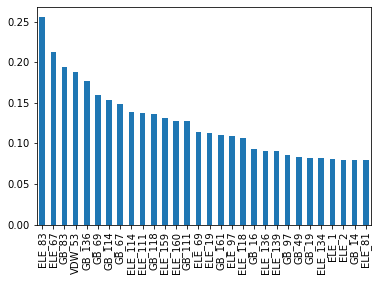

In [799]:
df_rk.T.plot(kind= 'bar',rot=90, legend=None)

In [800]:
#model.get_layer(name='Contextual_Weight').get_weights()[0][0].shape

# Cross Validation

# Pairwise

In [801]:
path3 = '/Users/chadp/Documents/MIEC/Gen/generalizePairDist_15A_noH_10A.list'


In [802]:
df5 = pd.read_csv(path3, sep='\\t', header=None)
df5.columns = ['res1','res2','prot_res','lig_res','arb1','dist','arb2']


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#df5




C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [803]:
df_rk.columns
df_2lt = list(df_rk.columns)

df_2lt
int_term = []
int_pair = []
for i in range(len(df_2lt)):
#    print(df_2lt[i].split('_'))
    int_term.append(df_2lt[i].split('_')[0])
    int_pair.append(df_2lt[i].split('_')[1])
    
#np.sort(int_pair)
#sorted(int_pair, key=int, reverse=False)

## Put them into DFs in case needed....
INT_TERM = pd.DataFrame(int_term, columns=['terms'])
INT_PAIR = pd.DataFrame(int_pair, columns=['pair'])

pd.concat([INT_TERM,INT_PAIR], axis=1)


## We need to even out vectors...so lets Filter data base on the limit of DF5
lt_pr = []
ind = []

for j in int_pair:
    j = int(j)
    if j < df5.shape[0]:
        lt_pr.append(df5.iloc[j])
 #       ind.append(df_rk.iloc[j]) 
        

lt_pr[0]        
#ind[0]
int_pair
f = pd.DataFrame(lt_pr)
g = pd.DataFrame(df_rk.columns,columns=['terms'])
#h = pd.DataFrame()
#pd.concat([g,f])
                 
##split data in into different columns

h = pd.DataFrame(int_term, columns=['int_term'])
gh = pd.concat([g,h,df_rkw],axis=1)
gh

,terms,int_term,weights
0,ELE_83,ELE,0.255
1,ELE_67,ELE,0.212
2,GB_83,GB,0.194
3,VDW_53,VDW,0.188
4,GB_136,GB,0.177
5,GB_69,GB,0.159
6,GB_114,GB,0.153
7,GB_67,GB,0.149
8,ELE_114,ELE,0.139
9,ELE_111,ELE,0.137


# Bring pairwise and interaction data (terms and corresponding prot/lig)

In [804]:
### This


gh['pos'] = gh['terms'].str.split('_', expand=True).iloc[:,1].astype(int)
#g.reset_index()
gh = gh[gh['pos'] < int(df5.shape[0])].reset_index()

## These are the ligand terms (intermolecular interactions)
#lig =g[g['pos'] > int(df5.shape[0])]

f = f.reset_index()
gg=pd.concat([gh,f], axis = 1)
gg = gg[['terms','int_term','pos','prot_res','lig_res','dist','weights']]


gg
#dfg
## Now we can remove rows base on pos column to even out lengths

### We need to add amino acids corresponding to the protein and the ligand
### We also need to get corresponding weights..(Doh!)



,terms,int_term,pos,prot_res,lig_res,dist,weights
0,ELE_83,ELE,83,35.0,-2.0,5.410,0.255
1,ELE_67,ELE,67,28.0,-1.0,7.932,0.212
2,GB_83,GB,83,35.0,-2.0,5.410,0.194
3,VDW_53,VDW,53,24.0,-3.0,3.583,0.188
4,GB_136,GB,136,45.0,-6.0,5.671,0.177
5,GB_69,GB,69,30.0,-1.0,8.083,0.159
6,GB_114,GB,114,42.0,-6.0,5.448,0.153
7,GB_67,GB,67,28.0,-1.0,7.932,0.149
8,ELE_114,ELE,114,42.0,-6.0,5.448,0.139
9,ELE_111,ELE,111,42.0,-4.0,3.397,0.137


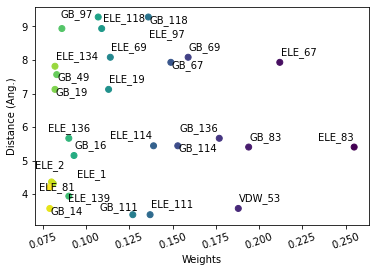

In [805]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

#sns.lmplot(data=gg, x='weights', y='dist', hue='terms', legend = False )
#sns.lineplot(data=gg, x='weights', y='dist', hue='terms',legend=None)
fig, ax = plt.subplots()

p1 = ax.scatter(gg['weights'],gg['dist'],c=pd.factorize(gg['terms'])[0])

texts = []
for i, txt in enumerate(gg['terms']):
    texts.append(ax.annotate(txt, xy=(gg['weights'][i], gg['dist'][i]),\
                             xytext=(gg['weights'][i],gg['dist'][i]+.1), size=10, rotation=0))
    
adjust_text(texts)
plt.xticks(rotation=20)
plt.xlabel('Weights')
plt.ylabel('Distance (Ang.)')
#plt.xlim(0.003,0.009)
#plt.ylim(3, 11)

#sns.lmplot(x = 'weights', y='dist', data = gg, line_kws={'color': 'g'})
# Annotate label points 
#for i, language in enumerate(gg['terms']):
#    text.append(.annotate(language,xy= (gg['weights'][i], gg['dist'][i]), textcoords='offset points',\
#                 xytext=(10, 10), rotation=45, ha = 'right', va = 'center',size=14)
plt.show()

In [806]:
df5.shape[0]

158

In [807]:
import re

#lt_df5 = []#

#for i in df5.index:
#    lt_df5.append(i)
#type(lt_df5)

In [808]:
#for i in lt_df5:
#    if i == string_2[i]:
#        print(i, string_1[i])


In [809]:


#int_pair

#for i in df5.index:
#    print(i)
    
#for k in INT_PAIR.index:
#    print(k)

#for j in int_pair:
#    print(j)

## 1-2

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 166, 4)]     0                                            
__________________________________________________________________________________________________
Conv1D_1 (Conv1D)               (None, 160, 16)      464         input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 160, 16)      64          Conv1D_1[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_44 (MaxPooling1D) (None, 80, 16)       0           batch_normalization_22[0][0]     
___________________________________________________________________________________________

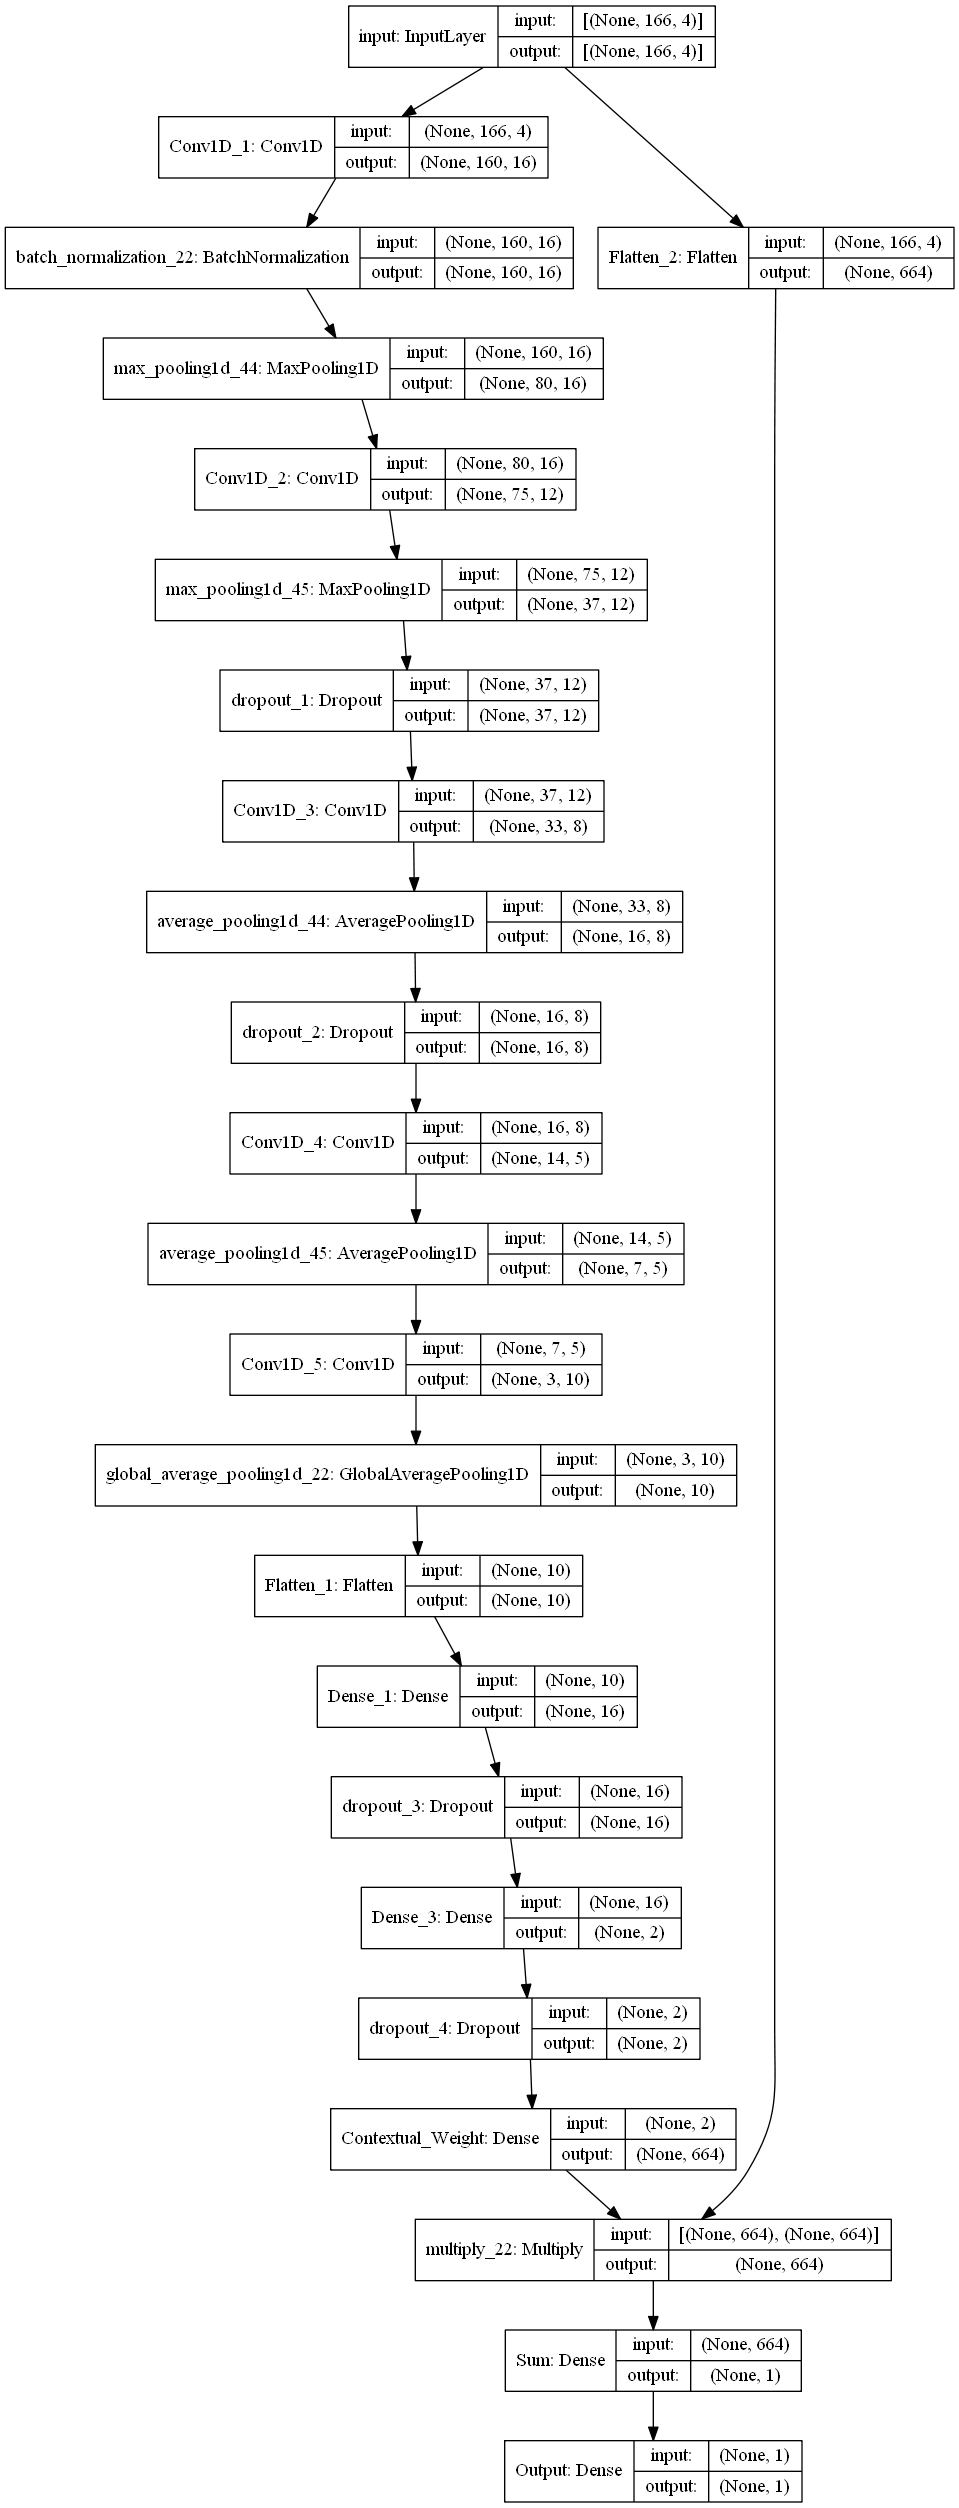

In [145]:
from numpy.random import seed
seed(123)


###  Convolutional Layer
layer0 = Input(shape=training_data.shape[1:], name='input')
layer1 = Conv1D(filters=16, kernel_size=7, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_1')(layer0)
layer2 = BatchNormalization()(layer1)
#model.add(LeakyReLU())
layer3 = MaxPool1D(pool_size=2, strides=2)(layer2)

layer4 = Conv1D(filters=12, kernel_size=6, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_2')(layer3)
layer5 = MaxPool1D(pool_size=2, strides=2)(layer4)
layer6 = Dropout(0.5, name='dropout_1')(layer5)

layer7 = Conv1D(filters=8, kernel_size=5, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_3')(layer6)
layer8 = AveragePooling1D(pool_size=2, strides=2)(layer7)
layer9 = Dropout(0.5, name='dropout_2')(layer8)

layer10 = Conv1D(filters=5, kernel_size=3, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_4')(layer9)
layer11 = AveragePooling1D(pool_size=2, strides=2)(layer10)

layer12 = Conv1D(filters=10, kernel_size=5, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_5')(layer11)
layer13 = GlobalAveragePooling1D()(layer12)

layer14 = Flatten(name='Flatten_1')(layer13)
layer15 = Dense(16,activation='relu',name='Dense_1')(layer14)
layer16 = Dropout(0.00099,name='dropout_3')(layer15)
layer17 = Dense(2,activation='relu',name='Dense_3')(layer16)

layer18 = Dropout(0.00099,name='dropout_4')(layer17)

### Contextual regression
layer19 = Dense(166*4,kernel_regularizer=tf.keras.regularizers.l1(0.0001),name='Contextual_Weight')(layer18) ## make first layer
layer20 = Dropout(0.00099,name='dropout_5')(layer19)

#### Dot Product
layer21 = Flatten(name='Flatten_2')(layer0)
layer22 = Multiply()([layer21,layer19]) ## same number of nodes as input feaures

layer23 = Dense(1,kernel_initializer='ones',use_bias=False,name='Sum')(layer22)
layer24 = Dense(1,name='Output')(layer23) 
model = Model(inputs=layer0, outputs=layer24)
model.summary()
keras.utils.plot_model(model, "model_with_shape_info.png", show_shapes=True)

In [146]:
from tensorflow.keras.optimizers import SGD, Adam
from keras.metrics import *
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping


#model.compile(optimizer='Adam',loss='mse',metrics =['accuracy'])
model.compile(SGD(lr=0.01, momentum=0.9),'mean_squared_error', metrics=['accuracy']) ##, momentum=0.9
earlystop_cb = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')
check_cb = ModelCheckpoint('bestparams2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(x_train3, y_train3, batch_size=32, epochs=100, validation_split=0.25, callbacks=[earlystop_cb, check_cb]) 



Epoch 1/100
116/116 [==============================] - 2s 9ms/step - loss: 0.1848 - accuracy: 0.7622 - val_loss: 0.1786 - val_accuracy: 0.7536

Epoch 00001: val_loss improved from inf to 0.17856, saving model to bestparams2.h5
Epoch 2/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1707 - accuracy: 0.7703 - val_loss: 0.1752 - val_accuracy: 0.7545

Epoch 00002: val_loss improved from 0.17856 to 0.17522, saving model to bestparams2.h5
Epoch 3/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1673 - accuracy: 0.7703 - val_loss: 0.1727 - val_accuracy: 0.7520

Epoch 00003: val_loss improved from 0.17522 to 0.17268, saving model to bestparams2.h5
Epoch 4/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1653 - accuracy: 0.7725 - val_loss: 0.1714 - val_accuracy: 0.7634

Epoch 00004: val_loss improved from 0.17268 to 0.17137, saving model to bestparams2.h5
Epoch 5/100
116/116 [==============================] - 1s 8ms/step - loss: 0.164

116/116 [==============================] - 1s 7ms/step - loss: 0.1519 - accuracy: 0.7838 - val_loss: 0.1646 - val_accuracy: 0.7747

Epoch 00039: val_loss did not improve from 0.16095
Epoch 40/100
116/116 [==============================] - 1s 7ms/step - loss: 0.1514 - accuracy: 0.7876 - val_loss: 0.1635 - val_accuracy: 0.7699

Epoch 00040: val_loss did not improve from 0.16095
Epoch 41/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1505 - accuracy: 0.7903 - val_loss: 0.1631 - val_accuracy: 0.7699

Epoch 00041: val_loss did not improve from 0.16095
Epoch 42/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1505 - accuracy: 0.7887 - val_loss: 0.1593 - val_accuracy: 0.7747

Epoch 00042: val_loss improved from 0.16095 to 0.15927, saving model to bestparams2.h5
Epoch 43/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1521 - accuracy: 0.7847 - val_loss: 0.1602 - val_accuracy: 0.7820

Epoch 00043: val_loss did not improve from 0.159


Epoch 00079: val_loss improved from 0.15519 to 0.15514, saving model to bestparams2.h5
Epoch 80/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1431 - accuracy: 0.7933 - val_loss: 0.1560 - val_accuracy: 0.7820

Epoch 00080: val_loss did not improve from 0.15514
Epoch 81/100
116/116 [==============================] - 1s 9ms/step - loss: 0.1441 - accuracy: 0.7909 - val_loss: 0.1553 - val_accuracy: 0.7739

Epoch 00081: val_loss did not improve from 0.15514
Epoch 82/100
116/116 [==============================] - 1s 9ms/step - loss: 0.1426 - accuracy: 0.7947 - val_loss: 0.1537 - val_accuracy: 0.7836

Epoch 00082: val_loss improved from 0.15514 to 0.15372, saving model to bestparams2.h5
Epoch 83/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1429 - accuracy: 0.7941 - val_loss: 0.1540 - val_accuracy: 0.7853

Epoch 00083: val_loss did not improve from 0.15372
Epoch 84/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1422 - accurac

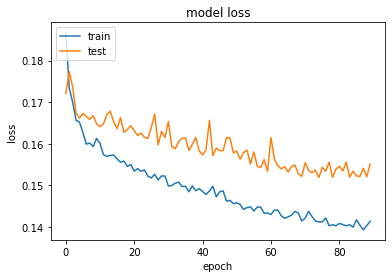

In [143]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

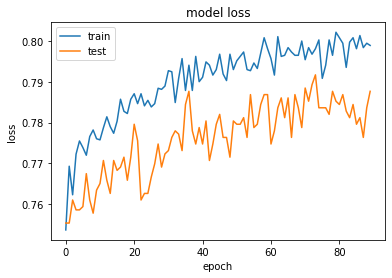

In [144]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
layer_names=[layer.name for layer in model.layers]
layer_names

['input',
 'Conv1D_1',
 'batch_normalization_11',
 'max_pooling1d_22',
 'Conv1D_2',
 'max_pooling1d_23',
 'dropout_1',
 'Conv1D_3',
 'average_pooling1d_22',
 'dropout_2',
 'Conv1D_4',
 'average_pooling1d_23',
 'Conv1D_5',
 'global_average_pooling1d_11',
 'Flatten_1',
 'Dense_1',
 'dropout_3',
 'Dense_3',
 'dropout_4',
 'Flatten_2',
 'Contextual_Weight',
 'multiply_11',
 'Sum',
 'Output']

In [159]:
model.get_layer('input').get_weights()

[]

# You could go though the layers of your model and retrieve its name and weights:

In [ ]:
{layer.name: layer.get_weights() for layer in model.layers}

# #2 Functional Form

Model: "model_38"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 166, 4)]     0                                            
__________________________________________________________________________________________________
Conv1D_1 (Conv1D)               (None, 160, 16)      464         input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_38 (BatchNo (None, 160, 16)      64          Conv1D_1[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_76 (MaxPooling1D) (None, 80, 16)       0           batch_normalization_38[0][0]     
___________________________________________________________________________________________

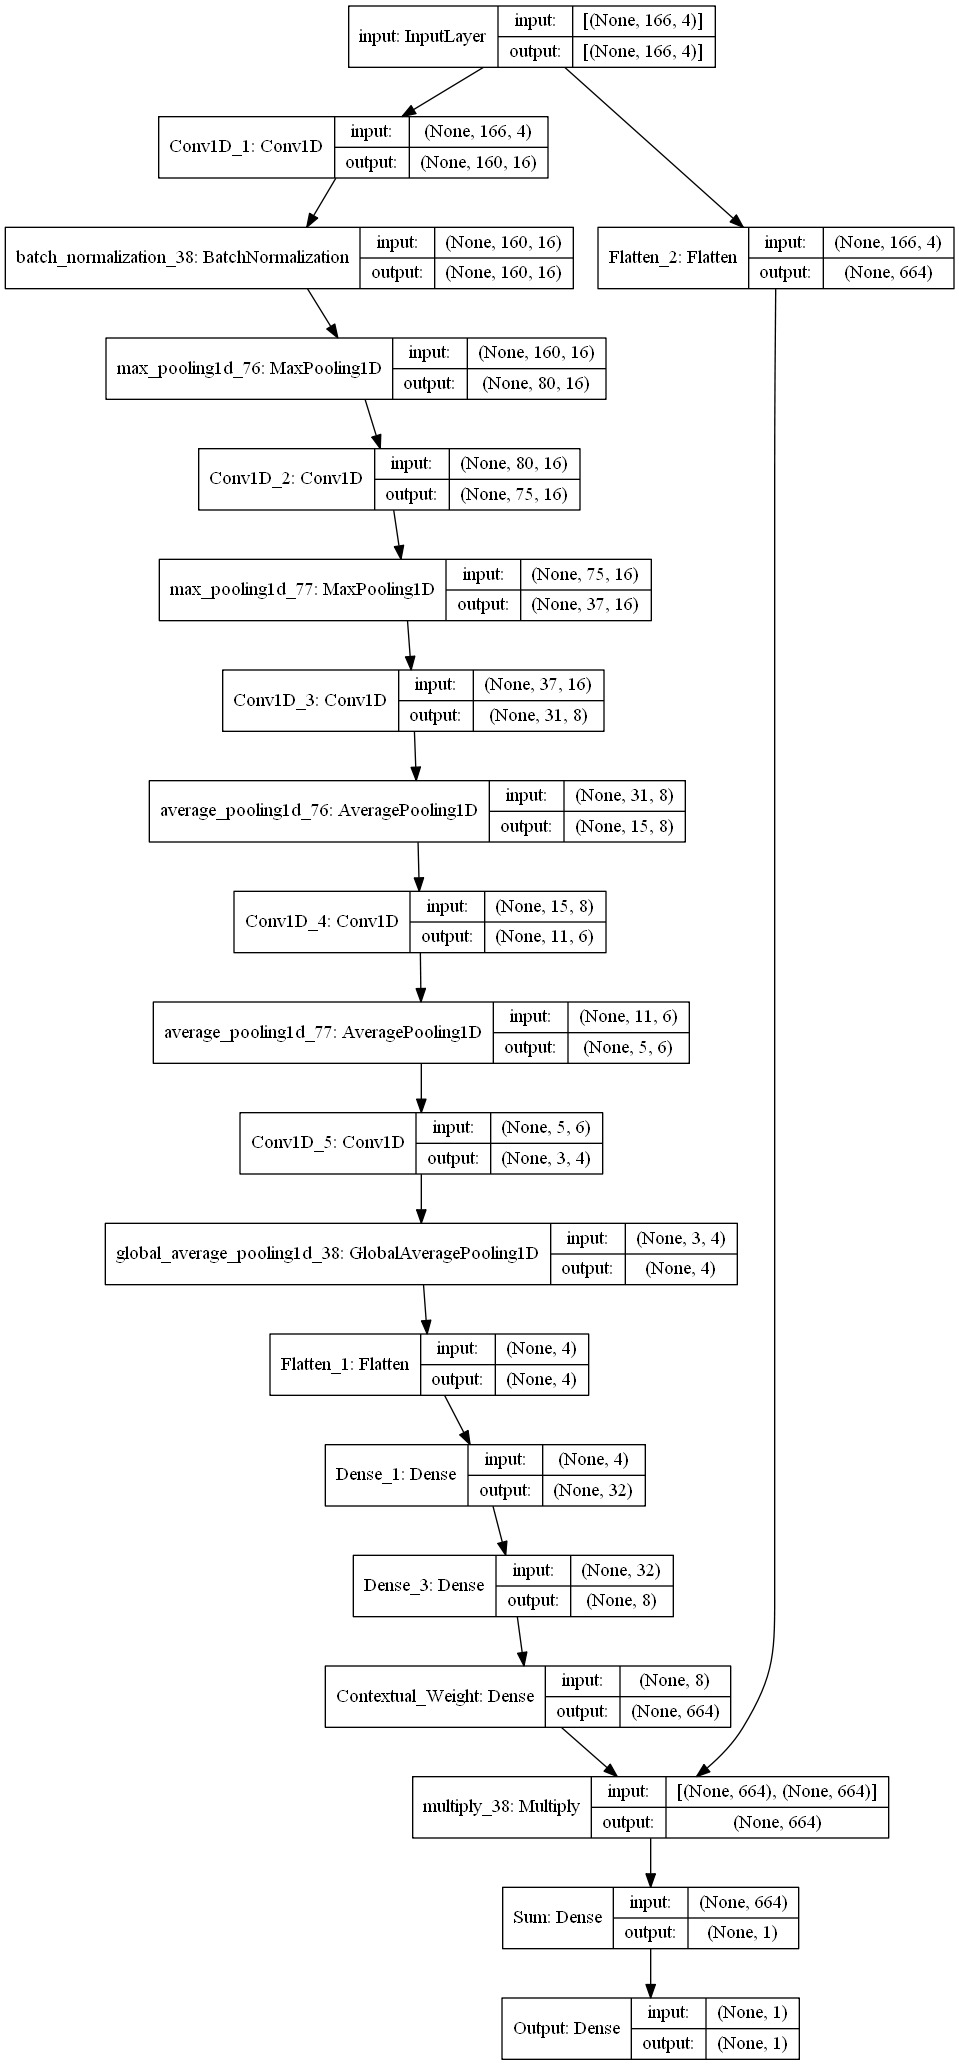

In [343]:
from numpy.random import seed
seed(123)

###  Convolutional Layer
layer0 = Input(shape=training_data.shape[1:], name='input')
layer1 = Conv1D(filters=16, kernel_size=7, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_1')(layer0)
layer2 = BatchNormalization()(layer1)
#model.add(LeakyReLU())
layer3 = MaxPool1D(pool_size=2, strides=2)(layer2)

layer4 = Conv1D(filters=16, kernel_size=6, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_2')(layer3)
layer5 = MaxPool1D(pool_size=2, strides=2)(layer4)

layer6 = Conv1D(filters=8, kernel_size=7, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_3')(layer5)
layer7 = AveragePooling1D(pool_size=2, strides=2)(layer6)

layer8 = Conv1D(filters=6, kernel_size=5, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_4')(layer7)
layer9 = AveragePooling1D(pool_size=2, strides=2)(layer8)

layer10 = Conv1D(filters=4, kernel_size=3, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_5')(layer9)
layer11 = GlobalAveragePooling1D()(layer10)

layer12 = Flatten(name='Flatten_1')(layer11)
layer13 = Dense(32,activation='relu',name='Dense_1')(layer12)
layer14 = Dense(8,activation='relu',name='Dense_3')(layer13)

### Contextual regression
layer15 = Dense(166*4,kernel_regularizer=tf.keras.regularizers.l1(0.0001),name='Contextual_Weight')(layer14) ## make first layer

#### Dot Product
layer16 = Flatten(name='Flatten_2')(layer0)
layer17 = Multiply()([layer16,layer15]) ## same number of nodes as input feaures

layer18 = Dense(1,kernel_initializer='ones',use_bias=False,name='Sum')(layer17)
layer19 = Dense(1,name='Output')(layer18) 
model = Model(inputs=layer0, outputs=layer19)
model.summary()
keras.utils.plot_model(model, "model_with_shape_info.png", show_shapes=True)

In [344]:
from tensorflow.keras.optimizers import SGD, Adam
from keras.metrics import *
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping


#model.compile(optimizer='Adam',loss='mse',metrics =['accuracy'])
model.compile(SGD(lr=0.01, momentum=0.9),'mean_squared_error', metrics=['accuracy']) ##, momentum=0.9
earlystop_cb = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')
check_cb = ModelCheckpoint('bestparams2.h5', monitor='accuracy', verbose=1, save_best_only=True, mode='min')
history = model.fit(x_train3, y_train3, batch_size=16, epochs=50, validation_split=0.15, callbacks=[earlystop_cb, check_cb]) 



Epoch 1/50
263/263 [==============================] - 2s 6ms/step - loss: 0.1969 - accuracy: 0.7637 - val_loss: 0.1913 - val_accuracy: 0.7584

Epoch 00001: accuracy improved from inf to 0.76371, saving model to bestparams2.h5
Epoch 2/50
263/263 [==============================] - 1s 5ms/step - loss: 0.1860 - accuracy: 0.7706 - val_loss: 0.1859 - val_accuracy: 0.7625

Epoch 00002: accuracy did not improve from 0.76371
Epoch 3/50
263/263 [==============================] - 1s 5ms/step - loss: 0.1841 - accuracy: 0.7682 - val_loss: 0.1864 - val_accuracy: 0.7544

Epoch 00003: accuracy did not improve from 0.76371
Epoch 4/50
263/263 [==============================] - 1s 5ms/step - loss: 0.1789 - accuracy: 0.7749 - val_loss: 0.1810 - val_accuracy: 0.7760

Epoch 00004: accuracy did not improve from 0.76371
Epoch 5/50
263/263 [==============================] - 1s 5ms/step - loss: 0.1759 - accuracy: 0.7749 - val_loss: 0.1771 - val_accuracy: 0.7760

Epoch 00005: accuracy did not improve from 0.7637

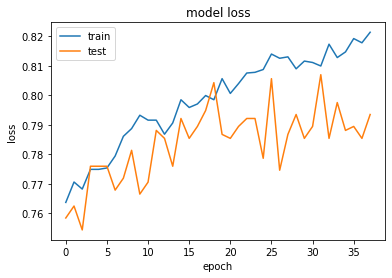

In [345]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [292]:
#a = model.predict(x_test3).round()

#for i in a:
#    print(np.absolute(a))

for i in range(len(x_test3)):
    print(x_test3(i))

TypeError: 'numpy.ndarray' object is not callable

In [160]:
np.asarray(model.predict(x_test3).round())

array([[ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [-0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [161]:
y_test3

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [155]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 166, 4]
[None, 163, 8]
[None, 163, 8]
[None, 81, 8]
[None, 75, 4]
[None, 37, 4]
[None, 31, 1]
[None, 15, 1]
[None, 14, 1]
[None, 7, 1]
[None, 7, 1]
[None, 1]
[None, 1]
[None, 32]
[None, 8]
[None, 664]
[None, 664]
[None, 664]
[None, 1]
[None, 1]


In [202]:
x_train3.shape


(4935, 166, 4)

In [48]:
model.layers[-6].weights[0]

IndexError: list index out of range

# Model #3 Functional Form

In [175]:
#model= Sequential()
layer0 = Input(shape=training_data.shape[1:], name='input')
layer1 = Conv1D(filters=16, kernel_size=1, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_1')(layer0)
layer2 = BatchNormalization()(layer1)
#model.add(LeakyReLU())
#layer3 = MaxPool1D(pool_size=2, strides=2)(layer2)

layer3 = Conv1D(filters=16, kernel_size=7, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_2')(layer2)
layer4 = MaxPool1D(pool_size=2, strides=2)(layer3)
layer5 = Dropout(0.5)(layer4)

layer6 = Conv1D(filters=5, kernel_size=3, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_3')(layer5)
layer7 = AveragePooling1D(pool_size=2, strides=2)(layer6)
layer8 = Dropout(0.5)(layer7)

layer9 = Conv1D(filters=5, kernel_size=3, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_4')(layer8)
layer10 = AveragePooling1D(pool_size=2, strides=2)(layer9)

layer11 = Conv1D(filters=10, kernel_size=5, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_5')(layer10)
layer12 = GlobalAveragePooling1D()(layer11)

layer13 = Flatten(name='Flatten_1')(layer12)
layer14 = Dense(16,activation='relu',name='Dense_1')(layer13)
layer15 = Dropout(0.00099,name='dropout_1')(layer14)
layer16 = Dense(2,activation='relu',name='Dense_2')(layer15)

layer17 = Dropout(0.00099,name='dropout_2')(layer16)

layer18 = Dense(166*4,kernel_regularizer=tf.keras.regularizers.l1(0.0001),name='Contextual_Weight')(layer17)
layer19 = Dropout(0.00099,name='dropout_3')(layer18)

layer20 = Flatten(name='Flatten_2')(layer19)
layer21 = Multiply()([layer18,layer20])

layer22 = Dense(1,kernel_initializer='ones',use_bias=False,name='Sum')(layer21)
layer23 = Dense(1,name='Output')(layer22) 
model = Model(inputs=layer0, outputs=layer23)
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 166, 4)]     0                                            
__________________________________________________________________________________________________
Conv1D_1 (Conv1D)               (None, 166, 16)      80          input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 166, 16)      64          Conv1D_1[0][0]                   
__________________________________________________________________________________________________
Conv1D_2 (Conv1D)               (None, 160, 16)      1808        batch_normalization_49[0][0]     
___________________________________________________________________________________________

In [176]:
from tensorflow.keras.optimizers import SGD, Adam
from keras.metrics import *
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping


#model.compile(optimizer='Adam',loss='mse',metrics =['accuracy'])
model.compile(SGD(lr=0.0005, momentum=0.9),'mean_squared_error', metrics=['mean_squared_error']) ##, momentum=0.9
earlystop_cb = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')
check_cb = ModelCheckpoint('bestparams2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(x_test3, y_test3, batch_size=32, epochs=10, validation_split=0.20, callbacks=[earlystop_cb, check_cb]) 


Epoch 1/10
14/14 [==============================] - 1s 24ms/step - loss: 0.3255 - mean_squared_error: 0.3193 - val_loss: 0.2655 - val_mean_squared_error: 0.2594

Epoch 00001: val_loss improved from inf to 0.26554, saving model to bestparams2.h5
Epoch 2/10
14/14 [==============================] - 0s 11ms/step - loss: 0.1406 - mean_squared_error: 0.1345 - val_loss: 0.2561 - val_mean_squared_error: 0.2500

Epoch 00002: val_loss improved from 0.26554 to 0.25613, saving model to bestparams2.h5
Epoch 3/10
14/14 [==============================] - 0s 9ms/step - loss: 0.1373 - mean_squared_error: 0.1312 - val_loss: 0.2491 - val_mean_squared_error: 0.2430

Epoch 00003: val_loss improved from 0.25613 to 0.24912, saving model to bestparams2.h5
Epoch 4/10
14/14 [==============================] - 0s 11ms/step - loss: 0.1348 - mean_squared_error: 0.1287 - val_loss: 0.2441 - val_mean_squared_error: 0.2380

Epoch 00004: val_loss improved from 0.24912 to 0.24415, saving model to bestparams2.h5
Epoch 5/1

#  Explore Keys & Values

In [ ]:
([key for key in mse_history.keys()][3], [value for value in mse_history.values()][3])

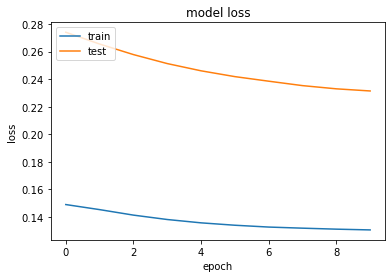

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [206]:
model.predict(x_test3)

array([[ 0.6082157 ],
       [ 0.19601476],
       [ 0.33802512],
       [ 0.27287716],
       [ 0.13837026],
       [ 0.06956065],
       [ 0.07807171],
       [ 0.4564736 ],
       [ 0.14976248],
       [ 1.1633441 ],
       [ 0.01170883],
       [-0.17637962],
       [ 0.2928697 ],
       [ 0.55463576],
       [ 0.01331824],
       [ 0.49453637],
       [ 0.31281272],
       [ 0.08670685],
       [ 0.35969537],
       [ 0.282567  ],
       [ 0.2478536 ],
       [ 0.14908282],
       [ 0.44598716],
       [ 0.24347208],
       [ 0.08529276],
       [ 0.6464489 ],
       [ 0.10967757],
       [ 0.15227595],
       [ 0.07525557],
       [ 0.161412  ],
       [ 0.04816595],
       [ 0.00887215],
       [ 0.07093123],
       [-0.03244349],
       [ 0.16501912],
       [ 0.01798266],
       [ 0.6523702 ],
       [ 0.21967855],
       [ 0.18668137],
       [ 0.27805218],
       [ 0.4476985 ],
       [ 0.38639167],
       [ 0.53512466],
       [ 1.2036583 ],
       [ 0.17787428],
       [ 0

In [168]:
x_test3.shape

(549, 166, 4)

In [444]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(np.asarray(ary1), ary_bindd, test_size=0.1, random_state=10)

In [475]:
def load_dataset(prefix=''):
    # load all train
    from sklearn.model_selection import train_test_split
    x_train2, x_test2, y_train2, y_test2 = train_test_split(np.asarray(ary1), ary_bindd, test_size=0.1, random_state=10)
   
    print(x_train2.shape, y_train2.shape)
    # load all test
    
    print(x_test2.shape, y_test2.shape)
    
    # Reshape Training data (n x m x 1)
    tr2 = training2_data.reshape(training2_data.shape[0], training2_data.shape[1], 1)
    
    # zero-offset class values
    
    
    # one hot encode y

    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return x_train2, x_test2, y_train2, y_test2

def evaluate_model(x_train2, x_test2, y_train2, y_test2):
    verbose, epochs, batch_size = 0, 10, 32
    #n_timesteps, n_features, n_outputs = x_train2.shape[1], x_train2.shape[2], y_train2.shape[0]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(x_test2, y_test2, batch_size=batch_size, verbose=0)
    return accuracy

In [476]:
# Make input shape // should be
input_data_shape = Input(shape=(training_data.shape[1:]))
print(input_data_shape)
print("shape1:",x_train2.shape, "shape2:", training_data.shape)


KerasTensor(type_spec=TensorSpec(shape=(None, 166, 4), dtype=tf.float32, name='input_19'), name='input_19', description="created by layer 'input_19'")
shape1: (4935, 664) shape2: (4935, 166, 4)


In [509]:
evaluate_model(x_train2, x_test2, y_train2, y_test2)

ValueError: in user code:

    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1330 test_function  *
        return step_function(self, iterator)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1313 run_step  **
        outputs = model.test_step(data)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1267 test_step
        y_pred = self(x, training=False)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_96 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 664)


In [451]:
x_train2.shape

(4935, 664)

In [500]:
def evaluate_model(x_train2, x_test2, y_train2, y_test2):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = x_train3.shape[1], x_train3.shape[2], 1 #y_train2.shape[0]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(166,4)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit network
    model.fit(x_train3, y_train3, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    # evaluate model
    _, accuracy = model.evaluate(x_test2, y_test2, batch_size=batch_size, verbose=0)
    model.summary()
    return accuracy

In [504]:
evaluate_model(x_train3, x_test3, y_train3, y_test3)
#x_train2.shape[0]
#x_train3.shape
print(y_train3.shape, x_train3.shape, x_train3.shape)

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           (None, 164, 64)           832       
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 162, 64)           12352     
_________________________________________________________________
dropout_18 (Dropout)         (None, 162, 64)           0         
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 81, 64)            0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 5184)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               518500    
_________________________________________________________________
dense_39 (Dense)             (None, 1)               

In [508]:
# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
    # run an experiment
def run_experiment(repeats=10):
    # load data
    x_train2, x_test2, y_train2, y_test2 
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(x_train2, x_test2, y_train2, y_test2)
        score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
    # summarize results
    summarize_results(scores)
 
    # run the experiment
run_experiment()

ValueError: in user code:

    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1330 test_function  *
        return step_function(self, iterator)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1313 run_step  **
        outputs = model.test_step(data)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1267 test_step
        y_pred = self(x, training=False)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_95 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 664)


## Decomposition Data

In [4]:
path2 = '/Users/chadp/Documents/MIEC/Decomposition/'

In [5]:
Filelist = glob.glob(path2+"*statistics*")
Filelist

['/Users/chadp/Documents/MIEC/Decomposition\\SUV92-1-MTN2_MS13_9_min_statistics.out',
 '/Users/chadp/Documents/MIEC/Decomposition\\SUV92-1-MTN2_MS14_9_min_statistics.out',
 '/Users/chadp/Documents/MIEC/Decomposition\\SUV92-1-MTN2_MS15_9_min_statistics.out',
 '/Users/chadp/Documents/MIEC/Decomposition\\SUV92-1-MTN2_MS16_9_min_statistics.out',
 '/Users/chadp/Documents/MIEC/Decomposition\\SUV92-1-MTN2_MS17_9_min_statistics.out',
 '/Users/chadp/Documents/MIEC/Decomposition\\SUV92-1-MTN2_MS18_9_min_statistics.out',
 '/Users/chadp/Documents/MIEC/Decomposition\\SUV92-1-MTN2_MS19_9_min_statistics.out',
 '/Users/chadp/Documents/MIEC/Decomposition\\SUV92-1-MTN2_MS20_9_min_statistics.out']

In [23]:
fd = pd.read_csv(Filelist[0])
with open(Filelist[0]) as f:
    lines = f.readlines()

In [26]:
lt1 = []
for i in range(len(Filelist)):
    with open(Filelist[i]) as f:
        lines = f.readlines()
print("finished")

finished


In [6]:
prot_res = []
lig_res = []
VDW = []
ELE = []
GB = []
SA = []
lt1 = []
p_data = []
Filelist = glob.glob(path2+"*statistics*")

for i in range(len(Filelist)):
    with open(Filelist[0]) as f:
        lines = f.readlines()
        lt1.append(lines)
print("Finished")


for index, line in enumerate(lines):
    if 18893 <= index <= 18891+3601:
        text = line.split("\\n")
        p_data.append(text)
        
for i, lines in enumerate(p_data):
    #print(i, str(lines[0]).split('|')[6].split(\"\\n\")[0].split('+/-')[0])
    prot_res.append(str(lines[0]).split('|')[0].split("\\n"))
    lig_res.append(str(lines[0]).split('|')[1].split("\\n"))
    VDW.append(str(lines[0]).split('|')[3].split("\\n")[0].split('+/-')[0])
    ELE.append(str(lines[0]).split('|')[4].split("\\n")[0].split('+/-')[0])
    GB.append(str(lines[0]).split('|')[5].split("\\n")[0].split('+/-')[0])
    SA.append(str(lines[0]).split('|')[6].split("\\n")[0].split('+/-')[0])
    
prot_res = pd.DataFrame(prot_res, columns = ['Protein'])
lig_res = pd.DataFrame(lig_res, columns = ['Ligand'])
VDW = pd.DataFrame(VDW, columns = ['VDW'])
ELE = pd.DataFrame(ELE, columns = ['ELE'])
GB = pd.DataFrame(GB, columns = ['GB'])
SA = pd.DataFrame(SA, columns = ['SA'])
df2 = pd.concat([prot_res, lig_res, VDW, ELE, GB, SA], axis = 1)
df2.to_csv(path2+"group1.csv")

        

Finished


In [7]:
### Averaging slected Columns & reformating
Filelist = glob.glob(path2+"*.csv")
length = len(Filelist)
kl = []
df2 = 0
for i in Filelist:
    i.split('Decom\\\\')[-1]
    df = pd.read_csv(i, delimiter=',')
    df2 += df.iloc[:,3:]/length 
    df3 = pd.read_csv(Filelist[0], delimiter=',').iloc[:,:3]
    df4 = pd.concat([df3, df2], axis = 1)



In [9]:
df4

,Unnamed: 0,Protein,Ligand,VDW,ELE,GB,SA
0,0,ASN 1,ASN 1,0.0,0.0,5.822000,0.000000
1,1,ASN 1,TYR 2,0.0,0.0,-0.572000,0.000000
2,2,ASN 1,ALA 3,0.0,0.0,-0.055500,0.000000
3,3,ASN 1,VAL 4,0.0,0.0,0.001750,0.000000
4,4,ASN 1,GLU 5,0.0,0.0,-0.002625,0.000000
...,...,...,...,...,...,...,...
3595,3595,SER 60,THR 56,0.0,0.0,-0.001875,0.000000
3596,3596,SER 60,ALA 57,0.0,0.0,-0.019625,0.000000
3597,3597,SER 60,ARG 58,0.0,0.0,-0.430875,-0.002125
3598,3598,SER 60,M1L 59,0.0,0.0,-0.559875,0.000000


## Generalized Pairs

In [223]:
path3 = '/Users/chadp/Documents/MIEC/Gen/generalizePairDist_15A_noH_10A.list'


In [224]:
df5 = pd.read_csv(path3, sep='\\t', header=None)
df5.columns = ['res1','res2','prot_res','lig_res','arb1','dist','arb2']


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df5

C:\Users\chadp\AppData\Roaming\Python\Python38\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,res1,res2,prot_res,lig_res,arb1,dist,arb2
0,1,1,1,-3,42560,3.801,39520
1,1,1,1,-2,42560,4.324,39520
2,1,1,1,-4,42560,4.372,39520
3,1,1,1,-1,42560,5.515,39520
4,1,1,1,-6,42560,7.953,39520
5,1,1,1,-5,42560,7.423,39520
6,1,1,1,0,42560,7.915,39520
7,1,1,2,-3,42560,3.023,39520
8,1,1,2,-4,42560,3.417,39520
9,1,1,2,-1,42560,4.031,39520


# Match interaction Pair

In [352]:
four_inter2(df2)

['VDW_0',
 'ELE_0',
 'GB_0',
 'SA_0',
 'VDW_1',
 'ELE_1',
 'GB_1',
 'SA_1',
 'VDW_2',
 'ELE_2',
 'GB_2',
 'SA_2',
 'VDW_3',
 'ELE_3',
 'GB_3',
 'SA_3',
 'VDW_4',
 'ELE_4',
 'GB_4',
 'SA_4',
 'VDW_5',
 'ELE_5',
 'GB_5',
 'SA_5',
 'VDW_6',
 'ELE_6',
 'GB_6',
 'SA_6',
 'VDW_7',
 'ELE_7',
 'GB_7',
 'SA_7',
 'VDW_8',
 'ELE_8',
 'GB_8',
 'SA_8',
 'VDW_9',
 'ELE_9',
 'GB_9',
 'SA_9',
 'VDW_10',
 'ELE_10',
 'GB_10',
 'SA_10',
 'VDW_11',
 'ELE_11',
 'GB_11',
 'SA_11',
 'VDW_12',
 'ELE_12',
 'GB_12',
 'SA_12',
 'VDW_13',
 'ELE_13',
 'GB_13',
 'SA_13',
 'VDW_14',
 'ELE_14',
 'GB_14',
 'SA_14',
 'VDW_15',
 'ELE_15',
 'GB_15',
 'SA_15',
 'VDW_16',
 'ELE_16',
 'GB_16',
 'SA_16',
 'VDW_17',
 'ELE_17',
 'GB_17',
 'SA_17',
 'VDW_18',
 'ELE_18',
 'GB_18',
 'SA_18',
 'VDW_19',
 'ELE_19',
 'GB_19',
 'SA_19',
 'VDW_20',
 'ELE_20',
 'GB_20',
 'SA_20',
 'VDW_21',
 'ELE_21',
 'GB_21',
 'SA_21',
 'VDW_22',
 'ELE_22',
 'GB_22',
 'SA_22',
 'VDW_23',
 'ELE_23',
 'GB_23',
 'SA_23',
 'VDW_24',
 'ELE_24',
 'GB_24',


In [ ]:
model = Sequential()
model.add(Input(shape=(training_data.shape[1:]), name="Input_layer"))
model.add(Conv1D(64, 8, input_shape =(training_data[1:]), activation='relu'))
model.add(MaxPooling1D(2))

model.add(Conv1D(32, 6, activation='relu'))
model.add(MaxPooling1D(2,2))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28,28)),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)



# Sequenctial Model for Contecual Regression but cannot do Dot Product

In [ ]:
model= Sequential()
model.add(Input(shape=training_data.shape[1:], name='input'))
model.add(Conv1D(filters=16, kernel_size=1, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_1'))
model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Conv1D(filters=16, kernel_size=7, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_2'))
model.add(MaxPool1D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=5, kernel_size=3, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_3'))
model.add(AveragePooling1D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=5, kernel_size=3, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_4'))
model.add(AveragePooling1D(pool_size=2, strides=2))

model.add(Conv1D(filters=10, kernel_size=5, strides=1, kernel_initializer='glorot_normal',activation='relu',name='Conv1D_5'))
model.add(LeakyReLU())
model.add(GlobalAveragePooling1D())

model.add(Flatten(name='Flatten_1'))
model.add(Dense(16,activation='relu',name='Dense_1'))
model.add(Dropout(0.00099,name='dropout_1'))
model.add(Dense(2,activation='relu',name='Dense_2'))
model.add(Dropout(0.00099,name='dropout_2'))

model.add(Dense(19*4,kernel_regularizer=tf.keras.regularizers.l1(0.0001),name='Contextual_Weight'))
model.add(Dropout(0.00099,name='dropout_3'))

model.add(Flatten(name='Flatten_2'))
#model.add(Multiply(name='Multiply')([model.get_layer(name='Contextual_Weight').output, model.get_layer(name='Flatten_2').output]))





# Other CR models

In [ ]:
# CR model
layer_0 = Input(shape=training_data.shape[1:],name='Input')

layer_1 = Conv1D(16,4,padding='same', kernel_initializer='glorot_normal',activation='relu',name='Conv1D_1')(layer_0)
layer_2 = MaxPool1D(50,name='MaxPool_1')(layer_1)

layer_3 = Conv1D(16,4,padding='same', kernel_initializer='glorot_normal',activation='relu',name='Conv1D_2')(layer_2)
layer_4 = MaxPool1D(2,name='MaxPool_2')(layer_3)

layer_5 = Conv1D(8,4,padding='same', kernel_initializer='glorot_normal',activation='relu',name='Conv1D_3')(layer_4)
layer_6 = MaxPool1D(1,name='MaxPool_3')(layer_5)

layer_7 = Flatten(name='Flatten_1')(layer_6)

layer_8 = Dense(16,name='Dense_1')(layer_7)
layer_9 = ReLU(name='ReLU_1')(layer_8)
layer_10 = Dropout(0.00099,name='dropout_1')(layer_9)

layer_11 = Dense(2,name='Dense_2')(layer_10)
layer_12 = ReLU(name='ReLU_2')(layer_11)
layer_13 = Dropout(0.00099,name='dropout_2')(layer_12)

layer_14 = Dense(166*4,kernel_regularizer=tf.keras.regularizers.l1(0.0001),name='Contextual_Weight')(layer_13)
layer_15 = Flatten(name='Flatten_2')(layer_0)
layer_16 = Multiply(name='Multiply')([layer_14,layer_15])

layer_17 = Dense(1,kernel_initializer='ones',use_bias=False,name='Sum')(layer_16)
layer_18 = Dense(1,name='Output')(layer_17)
model = Model(inputs=layer_0,outputs=layer_18)
model.layers[17].trainable = False 
model.summary()
keras.utils.plot_model(model, "CR-model.png", show_shapes=True)